In [0]:
import numpy 
print(numpy.__version__)

1.15.4


In [0]:
import matplotlib 
print(matplotlib.__version__)

3.0.0


In [0]:
import keras 
print(keras.__version__)

2.2.4


In [0]:
import tensorflow 
print(tensorflow.__version__)

1.12.0


In [0]:
import PIL 
print(PIL.__version__)

5.3.0


In [0]:
import cv2 
print(cv2.__version__)

3.4.3


In [0]:
import moviepy 
print(moviepy.__version__)

0.2.3.5


In [0]:
import tensorflow as tf
import keras

# #cpu - gpu configuration
config = tf.ConfigProto(device_count={'GPU': 2 , 'CPU': 4} ) #max: 1 gpu, 56 cpu
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

Using TensorFlow backend.


In [0]:
import numpy as np

with open("fer2013/fer2013.csv") as f:
    content = f.readlines()
lines = np.array(content)
num_of_instances = lines.size
print("实例数量：{}。".format(num_of_instances))
print("实例长度：{}。".format(len(lines[1].split(",")[1].split(" "))))

实例数量：35888。
实例长度：2304。


In [0]:
lines[:1]

array(['emotion,pixels,Usage\n'], dtype='<U9230')

In [0]:
from keras import utils

class_list = ["angry", "disgust", "fear", "happy", "sad", "surprise", "neutral"]
num_classes = len(class_list)
X_train, y_train, X_valid, y_valid, X_test, y_test = [], [], [], [], [], []

for i in range(1, num_of_instances):
    try:
        emotion, img, usage = lines[i].split(",")          
        val = img.split(" ")
        pixels = np.array(val, np.float32)
        emotion = utils.to_categorical(emotion, num_classes)
        if 'Training' in usage:
            y_train.append(emotion)
            X_train.append(pixels)
        elif 'PublicTest' in usage:
            y_test.append(emotion)
            X_test.append(pixels)
    except:
        print("", end="")
        
half_test_len = int(len(X_test) / 2)
X_valid = X_test[:half_test_len]
y_valid = y_test[:half_test_len]
X_test = X_test[half_test_len:]
y_test = y_test[half_test_len:]

In [0]:
X_train = np.array(X_train, np.float32)
y_train = np.array(y_train, np.float32)

X_valid = np.array(X_valid, np.float32)
y_valid = np.array(y_valid, np.float32)

X_test = np.array(X_test, np.float32)
y_test = np.array(y_test, np.float32)

X_train /= 255 
X_valid /= 255
X_test /= 255

img_width = 48
img_height = 48

X_train = X_train.reshape(X_train.shape[0], img_width, img_height, 1)
X_train = X_train.astype(np.float32)

X_valid = X_valid.reshape(X_valid.shape[0], img_width, img_height, 1)
X_valid = X_valid.astype(np.float32)

X_test = X_test.reshape(X_test.shape[0], img_width, img_height, 1)
X_test = X_test.astype(np.float32)

print("X_train.shape={}, y_train.shape={}.".format(X_train.shape, y_train.shape))
print("X_valid.shape={}, y_valid.shape={}.".format(X_valid.shape, y_valid.shape))
print("X_test.shape={}, y_test.shape={}.".format(X_test.shape, y_test.shape))

X_train.shape=(28709, 48, 48, 1), y_train.shape=(28709, 7).
X_valid.shape=(1794, 48, 48, 1), y_valid.shape=(1794, 7).
X_test.shape=(1795, 48, 48, 1), y_test.shape=(1795, 7).


In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

model = Sequential()

model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(img_width, img_height, 1)))
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 44, 44, 64)        1664      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
average_pooling2d_1 (Average (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)          0         
__________

In [0]:
import keras
from keras.preprocessing.image import ImageDataGenerator

batch_size = 256
epochs = 20

imgGenerator = ImageDataGenerator()
train_generator = imgGenerator.flow(X_train, y_train, batch_size=batch_size)

model.compile(loss='categorical_crossentropy'
    , optimizer=keras.optimizers.Adam()
    , metrics=['accuracy']
)

history = model.fit_generator(train_generator, 
                              steps_per_epoch=batch_size, epochs=epochs,
                              validation_data=(X_valid, y_valid),
                              verbose=1) #train for randomly selected one

Epoch 1/20
256/256 [==============================] - 7s 27ms/step - loss: 1.8027 - acc: 0.2517 - val_loss: 1.7376 - val_acc: 0.2821
Epoch 2/20
256/256 [==============================] - 5s 21ms/step - loss: 1.6555 - acc: 0.3258 - val_loss: 1.5380 - val_acc: 0.4013
Epoch 3/20
256/256 [==============================] - 5s 21ms/step - loss: 1.5118 - acc: 0.4072 - val_loss: 1.4068 - val_acc: 0.4532
Epoch 4/20
256/256 [==============================] - 5s 21ms/step - loss: 1.4249 - acc: 0.4472 - val_loss: 1.3560 - val_acc: 0.4833
Epoch 5/20
256/256 [==============================] - 6s 22ms/step - loss: 1.3586 - acc: 0.4755 - val_loss: 1.3058 - val_acc: 0.5078
Epoch 6/20
256/256 [==============================] - 6s 22ms/step - loss: 1.3253 - acc: 0.4910 - val_loss: 1.2562 - val_acc: 0.5223
Epoch 7/20
256/256 [==============================] - 6s 22ms/step - loss: 1.2830 - acc: 0.5082 - val_loss: 1.2527 - val_acc: 0.5151
Epoch 8/20
256/256 [==============================] - 6s 22ms/step - 

In [0]:
train_score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss: {}.'.format(train_score[0]))
print('Train accuracy: {}.'.format(train_score[1]))
 
test_score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: {}.'.format(test_score[0]))
print('Test accuracy: {}.'.format(test_score[1]))

Train loss: 0.9199279783379052.
Train accuracy: 0.6604200773287053.
Test loss: 1.1018399342188927.
Test accuracy: 0.5855153203508648.


In [0]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


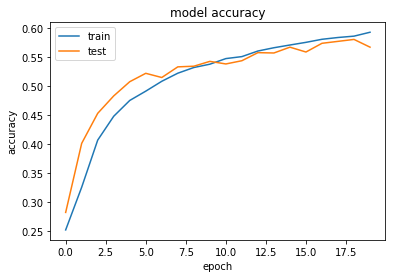

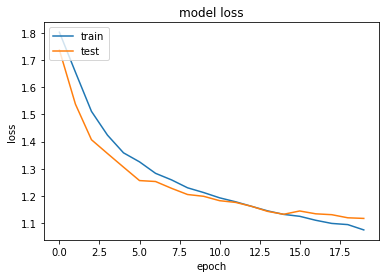

In [0]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
model_json = model.to_json()
with open("facial_expression_recog_model_architecture.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("facial_expression_recog_model_weights.h5")

In [0]:
from keras.models import model_from_json
from keras.models import load_model

with open('facial_expression_recog_model_architecture.json', 'r') as json_file:
    loaded_model_json = json_file.read()
    loaded_model = model_from_json(loaded_model_json)
    
loaded_model.load_weights("facial_expression_recog_model_weights.h5")

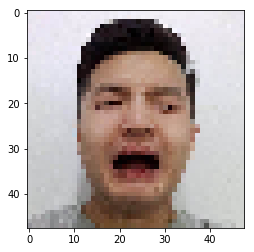

In [0]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

def plot_src_image(img_path, grayscale=False):
    img = image.load_img(img_path, grayscale=grayscale, target_size=(48, 48, 3))
    plt.imshow(img)
    plt.show()

plot_src_image("test_imgs/victor_7.jpg")

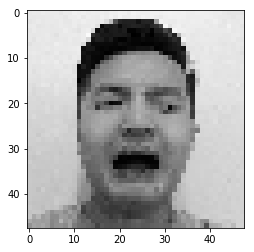

In [0]:
plot_src_image("test_imgs/victor_7.jpg", grayscale=True)

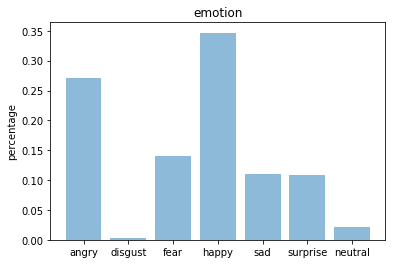

In [0]:
import numpy as np
from keras.preprocessing import image

def load_img(img_path, width=48, height=48):
    img = image.load_img(img_path, grayscale=True, target_size=(width, height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255
    return x

def plot_analyzed_emotion(emotions_probs, class_list):
    y_pos = np.arange(len(class_list))
    plt.bar(y_pos, emotions_probs, align='center', alpha=0.5)
    plt.xticks(y_pos, class_list)
    plt.ylabel('percentage')
    plt.title('emotion')
    plt.show()

test_img = load_img("test_imgs/victor_7.jpg")
predicted_probs = loaded_model.predict(test_img)

class_list = ["angry", "disgust", "fear", "happy", "sad", "surprise", "neutral"]
plot_analyzed_emotion(predicted_probs[0], class_list)

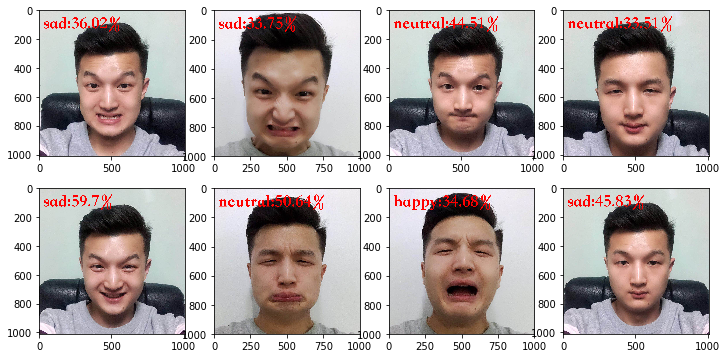

In [0]:
from glob import glob
import matplotlib
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import ImageFont, ImageDraw, Image
import random

def plot_emotion_faces(filepaths):
    random.shuffle(filepaths)
    fontpath = "Songti.ttc"
    font = ImageFont.truetype(fontpath, 120)
    fig, axes = plt.subplots(nrows=2, ncols=4)
    fig.set_size_inches(12, 6)
    index = 0
    for row_index in range(2): 
        for col_index in range(4): 

            predicted_probs = loaded_model.predict(load_img(filepaths[index]))
            probs = predicted_probs[0]
            max_index = np.argmax(probs)  
            probs_val = probs[max_index] 
            emotion = class_list[max_index] 
            emotion_text = emotion + ":" + str(round(probs_val * 100, 2)) + "%"
            
            img = matplotlib.image.imread(filepaths[index])
            img_PIL = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            draw = ImageDraw.Draw(img_PIL)
            draw.text((30, 5), emotion_text, font=font, fill=(0, 0, 255))
            final_img = cv2.cvtColor(np.asarray(img_PIL), cv2.COLOR_RGB2BGR)
            
            ax = axes[row_index, col_index]
            ax.imshow(final_img)
            index += 1
            
test_img_filenames = glob("test_imgs/*.jpg")
plot_emotion_faces(test_img_filenames)

# 视频转换

In [0]:
from keras.models import model_from_json
from keras.models import load_model

# 加载模型架构
with open('facial_expression_recog_model_architecture.json', 'r') as json_file:
    loaded_model_json = json_file.read()
    loaded_model = model_from_json(loaded_model_json)
    
# 加载模型权重
loaded_model.load_weights("facial_expression_recog_model_weights.h5")

In [0]:
import cv2
import numpy as np
from PIL import ImageFont, ImageDraw, Image

fontpath = "Songti.ttc"
font = ImageFont.truetype(fontpath, 32)

cascPath = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascPath)

class_list = ["angry", "disgust", "fear", "happy", "sad", "surprise", "neutral"]

In [0]:
def predict_class(image_frame, x, y, w, h, target_class_list, model):
    face_crop = image_frame[y:y + h, x:x + w]
    face_crop = cv2.resize(face_crop, (48, 48))
    face_crop = cv2.cvtColor(face_crop, cv2.COLOR_BGR2GRAY)
    face_crop = face_crop.astype(np.float32) / 255
    face_crop = np.asarray(face_crop)
    face_crop = face_crop.reshape(1, face_crop.shape[0], face_crop.shape[1], 1)
    emotion_result = target_class_list[np.argmax(model.predict(face_crop))]
    return emotion_result


def redraw_image(image_frame, emotion_result, x, y):
    img_PIL = Image.fromarray(cv2.cvtColor(image_frame, cv2.COLOR_BGR2RGB))
    draw = ImageDraw.Draw(img_PIL)
    draw.text((x, y - 50), emotion_result, font=font, fill=(32, 183, 228))
    img = cv2.cvtColor(np.asarray(img_PIL), cv2.COLOR_RGB2BGR)
    return img

In [0]:
def process_frame(frame):  
    global counter
    if counter % 1 == 0:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = faceCascade.detectMultiScale(
            gray,
            scaleFactor=1.1,
            minNeighbors=5,
            minSize=(30, 30)
        )
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (228, 32, 183), 2)
            emotion_result = predict_class(frame, x, y, w, h, class_list, loaded_model)
            final_img = redraw_image(frame, emotion_result, x, y)
    counter += 1 
    return final_img

In [0]:
from moviepy.editor import VideoFileClip

input_filename = 'test_imgs/video.mp4'
output_filename = 'test_imgs/video_clipped.mp4'

counter = 0

clip_playing = VideoFileClip(input_filename).subclip(0,10) 
white_clip = clip_playing.fl_image(process_frame) 

%time white_clip.write_videofile(output_filename)

[MoviePy] >>>> Building video test_imgs/video_clipped.mp4
[MoviePy] Writing audio in video_clippedTEMP_MPY_wvf_snd.mp3


100%|██████████| 221/221 [00:00<00:00, 460.05it/s]

[MoviePy] Done.
[MoviePy] Writing video test_imgs/video_clipped.mp4



100%|██████████| 172/172 [00:15<00:00, 10.84it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_imgs/video_clipped.mp4 

CPU times: user 35.5 s, sys: 588 ms, total: 36.1 s
Wall time: 17 s


# 实时拍摄

In [0]:
import cv2
import numpy as np
from PIL import ImageFont, ImageDraw, Image

video_capture = cv2.VideoCapture(0)
fontpath = "Songti.ttc"
font = ImageFont.truetype(fontpath, 32)

cascPath = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascPath)

# class_list = ["angry", "disgust", "fear", "happy", "sad", "surprise", "neutral"]
cn_class_list = ["生气的", "厌恶的", "恐惧的", "高兴的", "伤心的", "惊喜的", "中立的"]

while True: 
    ret, frame = video_capture.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30)
    )
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (228, 32, 183), 2)
        emotion_result = predict_class(frame, x, y, w, h, cn_class_list, loaded_model)
        img = redraw_image(frame, emotion_result, x, y)
        cv2.imshow('Chapter 12 Facial Expression Recognition - by Zhang Qiang',
                   cv2.resize(img, (800, 500)))
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video_capture.release()
cv2.destroyAllWindows()

In [0]:
# https://github.com/21-projects-for-deep-learning/EmoPy
from EmoPy.src.fermodel import FERModel
model = FERModel(['happiness', 'surprise', 'disgust'], verbose=True)
model.predict("test_imgs/victor_2.jpg")

Initializing FER model parameters for target emotions: ['happiness', 'surprise', 'disgust']
happiness: 91.4%
surprise: 0.0%
disgust: 8.6%
Dominant emotion: happiness

